# Examen Programación en Python

**Objetivo:** demostrar manejo de **definiciones/funciones**, **bucles**, **condicionales** y **EDA** con **pandas**, **numpy** y **matplotlib**.

**Dataset:** `temperaturasDiariasPorEstaciones2012.csv` (delimitado por `;`). 




### Primeras observaciones

Se revisa el dataset para tener una noción de su estructura, los tipos de datos, su longitud, etc.

In [27]:
!pip install seaborn

In [28]:
#carga tus datos y librerias en este espacio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import re
import seaborn as sns

df = pd.read_csv("temperaturasDiariasPorEstaciones2012.csv", sep=";")

In [6]:
df.head(10)

,IdEstacion,Nombre Estacion,Latitud,Longitud,Altura,Año,Mes,Dia,TMinima,TMaxima
0,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,1,20.4,25.3
1,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,2,20.1,24.7
2,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,3,19.8,24.8
3,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,4,21.5,25.2
4,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,5,21.1,26.1
5,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,6,21.0,25.8
6,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,7,20.1,25.5
7,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,8,20.7,25.5
8,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,9,20.2,25.2
9,180005,"Chacalluta, Arica Ap.",18&deg 21' 5'' S,70&deg 20' 9'' W,63,2012,1,10,19.7,24.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11765 entries, 0 to 11764
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IdEstacion       11765 non-null  int64  
 1   Nombre Estacion  11765 non-null  object 
 2   Latitud          11765 non-null  object 
 3   Longitud         11765 non-null  object 
 4   Altura           11765 non-null  int64  
 5   Año              11765 non-null  int64  
 6   Mes              11765 non-null  int64  
 7   Dia              11765 non-null  int64  
 8   TMinima          11711 non-null  float64
 9   TMaxima          11569 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 919.3+ KB


In [8]:
df['Altura'].unique()

array([  63,   52, 2293,  113,   48,  204,  142,  330,  650,  527,  482,
         75,   35,  225,  151,   12,  120,   92,   21,   61,   85,  350,
        281,   10,  310,  520,  307,  196,   70,   38,   27,   30,   45])

In [9]:
df['IdEstacion'].unique()

array([180005, 200006, 220002, 230001, 270001, 270008, 290004, 330007,
       330019, 330020, 330021, 330030, 330031, 340031, 360011, 360019,
       370033, 380013, 390006, 400009, 410005, 430002, 430004, 450001,
       450004, 450005, 460001, 470001, 510005, 520006, 530005, 550001,
       950001])

In [10]:
df.shape

(11765, 10)

### Limpieza y preparación (10 pts)

1. Construya una columna `fecha` desde `Año`, `Mes`, `Dia` y configúrela como índice temporal.  ✅
2. Asegure tipos correctos (`float` para temperaturas; `int`/`str` donde corresponda).  ✅
3. Elimine duplicados, si es que los hay. Para esto básate en la columna de `fecha`. ✅
4. Reporte el **% de datos faltantes** por columna.   ✅
5. Documente en una celda Markdown las decisiones tomadas. ✅


In [11]:
#Crear fecha 
df_con_fecha = df.rename(columns={'Año': 'year', 'Mes':'month', 'Dia':'day'})
df_con_fecha['Fecha'] = pd.to_datetime(df_con_fecha[['year', 'month', 'day']])
df_con_fecha.drop(['year', 'month', 'day'], axis=1, inplace=True)

# Establecer la columna 'Fecha' como índice
df_con_fecha.set_index('Fecha', inplace=True)

# Quitar espacios adelante y atrás en la columna de estaciones
df_con_fecha["Nombre Estacion"] = df_con_fecha["Nombre Estacion"].str.strip()

In [12]:
#Modificar tipo de dato a las variables
df_con_fecha = df_con_fecha.astype({
    'IdEstacion': 'string',
    'Nombre Estacion': 'string',
    'Latitud': 'string',
    'Longitud': 'string'
})

In [13]:
print(df_con_fecha.dtypes)

IdEstacion         string[python]
Nombre Estacion    string[python]
Latitud            string[python]
Longitud           string[python]
Altura                      int64
TMinima                   float64
TMaxima                   float64
dtype: object


In [14]:
df_con_fecha["Nombre Estacion"].tail(10)

Fecha
2012-12-22    C.M.A. Eduardo Frei Montalva, Antartica
2012-12-23    C.M.A. Eduardo Frei Montalva, Antartica
2012-12-24    C.M.A. Eduardo Frei Montalva, Antartica
2012-12-25    C.M.A. Eduardo Frei Montalva, Antartica
2012-12-26    C.M.A. Eduardo Frei Montalva, Antartica
2012-12-27    C.M.A. Eduardo Frei Montalva, Antartica
2012-12-28    C.M.A. Eduardo Frei Montalva, Antartica
2012-12-29    C.M.A. Eduardo Frei Montalva, Antartica
2012-12-30    C.M.A. Eduardo Frei Montalva, Antartica
2012-12-31    C.M.A. Eduardo Frei Montalva, Antartica
Name: Nombre Estacion, dtype: string

In [15]:
duplicados = df_con_fecha.reset_index().duplicated(subset=["Fecha", "Nombre Estacion"], keep=False)

In [16]:
filas_duplicadas = df_con_fecha[df_con_fecha.index.duplicated(keep=False)]
print(filas_duplicadas)

           IdEstacion                          Nombre Estacion  \
Fecha                                                            
2012-01-01     180005                    Chacalluta, Arica Ap.   
2012-01-02     180005                    Chacalluta, Arica Ap.   
2012-01-03     180005                    Chacalluta, Arica Ap.   
2012-01-04     180005                    Chacalluta, Arica Ap.   
2012-01-05     180005                    Chacalluta, Arica Ap.   
...               ...                                      ...   
2012-12-27     950001  C.M.A. Eduardo Frei Montalva, Antartica   
2012-12-28     950001  C.M.A. Eduardo Frei Montalva, Antartica   
2012-12-29     950001  C.M.A. Eduardo Frei Montalva, Antartica   
2012-12-30     950001  C.M.A. Eduardo Frei Montalva, Antartica   
2012-12-31     950001  C.M.A. Eduardo Frei Montalva, Antartica   

                      Latitud           Longitud  Altura  TMinima  TMaxima  
Fecha                                                           

In [17]:
print(duplicados.sum())

0


In [18]:
print(round(df_con_fecha.isnull().sum() / len(df_con_fecha) * 100, 2))

IdEstacion         0.00
Nombre Estacion    0.00
Latitud            0.00
Longitud           0.00
Altura             0.00
TMinima            0.46
TMaxima            1.67
dtype: float64


**Decisiones**

- Se creó un nuevo DataFrame para poder trabajar con él sin perder el original.
- En este nuevo DF, luego de crear la columna fecha se eliminaron las columnas Día, Mes y Año, ya que sería un dato redundante.
- Había varias variables que tenían datos `object`, lo que funciona como string, pero buscando descubrí que python hoy acepta datos de tipo `string`, por lo que dichas variables fueron modificadas.
- Se eliminaron las columnas duplicadas de acuerdo con el índice Fecha especificado anteriormente como lo indican las instrucciones. Esto redujo las filas de más de once mil a cerca de trescientos, por lo que pensé que algo estaba mal. Entonces se revisaron de nuevo los duplicados pero esta vez considerando la fecha y el nombre de la estación lo que mostró que no hay duplicados.
- Por último se muestra el porcentaje de datos nulos por columna, lo que arroja un 0.46% en la columna TMinima y un 1.67% en la columna TMaxima.

**Conclusión**

El Dataset está bastante completo y sus columnas bien estructuradas, por lo que no requirió mayor, más allá de ajustar los tipos de datos y la fecha como indica el ejercicio. Teniendo esto concluido se dará paso a realizar los siguientes ejercicios con el dataset `df_con_fecha`

## Funciones utilitarias (30 pts)

1. Defina las siguientes **tres funciones**:

- `daily_range(tmin: float, tmax: float) -> float`: retorna el rango diario (`tmax - tmin`) de viariacion de la temperatura.  ✅
- `classify_day(tmin: float, tmax: float, q_low: float, q_high: float) -> str`: retorna una etiqueta (`"frío"`, `"templado"`, `"caluroso"`) según el siguiente criterio:  `frio` < 10 °C, `templado` > 10 °C pero < 24 °C y caluroso => 25°C Respecto a los valores máximos presentados por día ✅
- `monthly_quantiles(df_estacion: pd.DataFrame, month: int) -> tuple[float,float]`: retorna `(q10, q90)` de `TMaxima` para ese mes por estación. ✅

2. Usando las funciones anteriores:
- En que fecha se registro la variación de temperatura más grande en la estación C.M.A. Eduardo Frei Montalva, Antartica. ✅
- En el año 2012 cuantos dias calurosos hubo en el país. ✅
- Genera una Gráfica donde se muestren la distrubución los días frios registrados por estación. ✅
-  De acuedo a las temperaturas  máximas registradas por cada estación: 
-  Cuál fue el mes del año más caluroso. ✅
-  Cuál fue el mes del año más frio. ✅
-  Qué estación documento la temperatura máxima más alta y en qué mes fue. ✅
-  Qué estación documento la temperatura máxima más baja y en qué mes fue. ✅
3. Documente en una celda Markdown las conclusiones a las que llegaste.

In [19]:
# Función daily_range
def daily_range(tmin: float, tmax: float) -> float:
    return tmax - tmin

# Función classify_day
def classify_day(tmin: float, tmax:float, q_low:float = 10, q_high:float = 25)-> str:
    if tmax < q_low:
        return "Frío"
    elif tmax < q_high:
        return "Templado"
    else:
        return "Caluroso"

def monthly_quantiles(df_estacion: pd.DataFrame, month: int) -> tuple[float, float]:
    """Retorna los percentiles 10 y 90 de TMaxima para un mes dado"""
    df_mes = df_estacion[df_estacion["Fecha"].dt.month == month]
    q10 = df_mes["TMaxima"].quantile(0.10)
    q90 = df_mes["TMaxima"].quantile(0.90)
    return q10, q90

In [20]:
# Filtrar por la estación deseada
df_estacion = df_con_fecha[df_con_fecha["Nombre Estacion"] == "C.M.A. Eduardo Frei Montalva, Antartica"].copy()

# Calcular el rango diario usando la función
df_estacion["rango"] = df_estacion.apply(lambda row: daily_range(row["TMinima"], row["TMaxima"]), axis=1)

# Obtener la fecha (índice) con el rango máximo
fecha_max_rango = df_estacion["rango"].idxmax()

print("Fecha con mayor variación de temperatura:", fecha_max_rango)

Fecha con mayor variación de temperatura: 2012-06-05 00:00:00


In [19]:
# Filtrar por año 2012
df_2012 = df_con_fecha[df_con_fecha.index.year == 2012].copy()

# Clasificar cada fila por estación
df_2012["clasificacion"] = df_2012.apply(
    lambda row: classify_day(row["TMinima"], row["TMaxima"], 10, 25),
    axis=1
)

# Agrupar por fecha y calcular porcentaje de estaciones calurosas
dias_calurosos_2012 = (
    df_2012.groupby(df_2012.index.date)["clasificacion"]
    .apply(lambda x: (x == "Caluroso").mean() > 0.5)  # más del 50%
)

# Contar días calurosos
n_calurosos = dias_calurosos_2012.sum()

print("Número de días calurosos en 2012:", n_calurosos)

#Criterio: si más del 50% de las estaciones tienen un día caluroso se considera un día caluroso en el país.

Número de días calurosos en 2012: 19


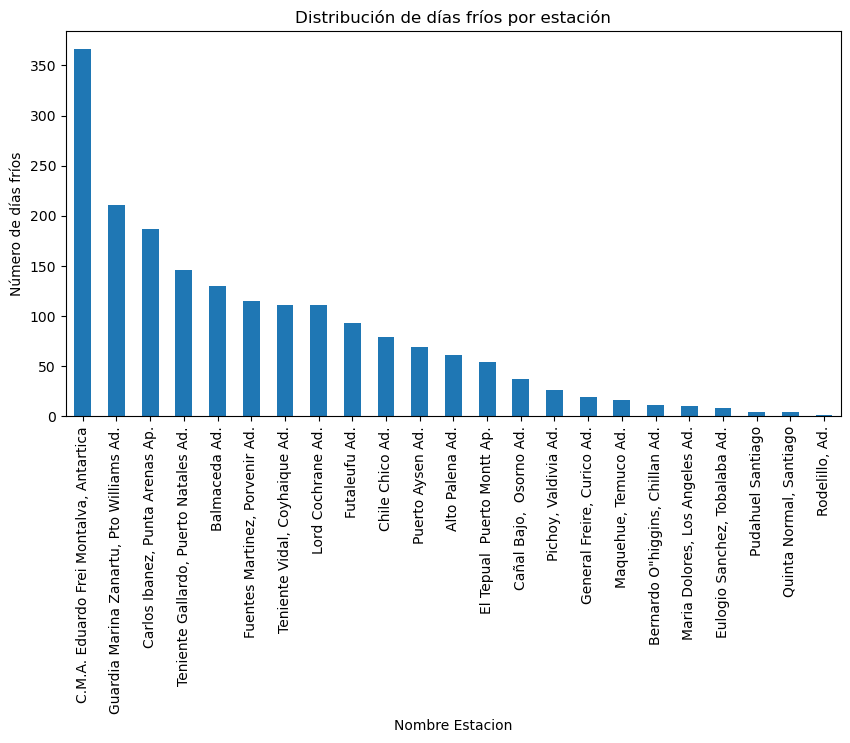

In [20]:
dias_frios = df_con_fecha.apply(lambda row: classify_day(row["TMinima"], row["TMaxima"]), axis=1)
df_frios = df_con_fecha[dias_frios == "Frío"]
conteo_frios = df_frios["Nombre Estacion"].value_counts()

conteo_frios.plot(kind="bar", figsize=(10,5))
plt.ylabel("Número de días fríos")
plt.title("Distribución de días fríos por estación")
plt.show()

In [21]:
# Extraer el mes desde el índice Fecha
df_con_fecha["Mes"] = df_con_fecha.index.month

# Agrupar por estación y mes, y calcular la temperatura máxima
max_temps = df_con_fecha.groupby(["Nombre Estacion", "Mes"])["TMaxima"].max().reset_index()

# Mes más caluroso por estación
mes_caluroso = max_temps.loc[max_temps.groupby("Nombre Estacion")["TMaxima"].idxmax()]

# Mes más frío por estación
mes_frio = max_temps.loc[max_temps.groupby("Nombre Estacion")["TMaxima"].idxmin()]

# Mostrar resultados
print("Mes más caluroso por estación:")
print(mes_caluroso)

print("\nMes más frío por estación:")
print(mes_frio)

Mes más caluroso por estación:
                              Nombre Estacion  Mes  TMaxima
0                             Alto Palena Ad.    1     33.0
12                              Balmaceda Ad.    1     28.8
24            Bernardo O"higgins, Chillan Ad.    1     37.0
38    C.M.A. Eduardo Frei Montalva, Antartica    3      8.4
49            Carlos Ibanez, Punta Arenas Ap.    2     21.2
62                   Carriel Sur, Concepcion.    3     29.7
72                    Cañal Bajo,  Osorno Ad.    1     32.5
87             Cerro Moreno  Antofagasta  Ap.    4     27.7
98                      Chacalluta, Arica Ap.    3     28.6
108                           Chile Chico Ad.    1     32.2
122         Desierto de Atacama, Caldera  Ap.    3     26.9
133                 Diego Aracena Iquique Ap.    2     29.0
146                        El Loa, Calama Ad.    3     29.2
156               El Tepual  Puerto Montt Ap.    1     26.4
170             Eulogio Sanchez, Tobalaba Ad.    3     36.0
181      

In [21]:
# Fila con temperatura máxima absoluta
fila_max = df_con_fecha.loc[df_con_fecha["TMaxima"].idxmax()]
if isinstance(fila_max, pd.DataFrame):  # por si acaso hay más de una fila
    fila_max = fila_max.iloc[0]

estacion_max = fila_max["Nombre Estacion"]
mes_max = fila_max.name.month   # ahora sí funciona

# Fila con temperatura mínima absoluta
fila_min = df_con_fecha.loc[df_con_fecha["TMaxima"].idxmin()]
if isinstance(fila_min, pd.DataFrame):
    fila_min = fila_min.iloc[0]

estacion_min = fila_min["Nombre Estacion"]
mes_min = fila_min.name.month

print(f"Temperatura máxima más alta: estación {estacion_max}, mes {mes_max}")
print(f"Temperatura máxima más baja: estación {estacion_min}, mes {mes_min}")

Temperatura máxima más alta: estación Chacalluta, Arica Ap., mes 1
Temperatura máxima más baja: estación Chacalluta, Arica Ap., mes 6


**Conclusiones**

El análisis de las temperaturas máximas y mínimas a lo largo de las estaciones meteorológicas del país revela una marcada diversidad climática. La mayor variación diaria de temperatura se registró en la Antártica, lo que refleja la fuerte inestabilidad térmica de esa zona. El criterio para considerar un día caluroso es que más del 50% de las estaciones muestren una temperatura considerada calurosa. Con base en dicho criterio en el año 2012 solo se contabilizaron 19 días calurosos, lo que muestra que los extremos de calor no son frecuentes en gran parte del territorio nacional.

En términos estacionales, los meses más calurosos se concentraron principalmente en enero y marzo, mientras que los meses más fríos se registraron en junio y julio, concordando con el ciclo natural de estaciones en el hemisferio sur. Asimismo, la distribución de días fríos confirma que el extremo austral concentra la mayor cantidad de registros, con Eduardo Frei Montalva (Antártica) liderando ampliamente.

Finalmente, se observa que las temperaturas máximas extremas abarcan desde valores sobre los 35 °C en el norte y centro del país, hasta temperaturas apenas sobre los 0 °C en la Antártica. Esto pone en evidencia la heterogeneidad climática de Chile, que va desde climas desérticos y cálidos en el norte, templados y lluviosos en el sur, hasta condiciones polares en la Antártica.

## Detección de olas de calor (30 pts)

Defina una **ola de calor** como **≥ 3 días consecutivos** con `TMaxima` **> Percentil 90** del mes y estación.

1. Para cada estación, calcule P90 mensual de `TMaxima`.  ✅
2. Detecte eventos (inicio, fin, duración) y obtenga: **número de eventos** y **duración máxima** por estación.  ✅
3. Para una estación `Maquehue, Temuco Ad.`, crea una matriz día-del-mes × mes (o día-del-año × semana) con: 1 si es día en ola, 0 si no.
4. Calcula el Top-10 eventos por severidad y por duración
5. Existe una correlacion entre lo eventos de ola de calor y la Latitud y altura
- Genera una correlación de Pearson
- Genera un gráfico de dispersión con línea de tendencia
6. Documente en una celda Markdown las conclusiones a las que llegaste




In [24]:
# Calcular P90 mensual de TMaxima para cada estación
p90_mensual = df.groupby(['IdEstacion', 'Nombre Estacion', 'Mes'])['TMaxima'].quantile(0.90).reset_index()
p90_mensual.rename(columns={'TMaxima': 'P90_TMaxima'}, inplace=True)
print("P90 mensual por estación:")
print(p90_mensual.head(10))

P90 mensual por estación:
   IdEstacion        Nombre Estacion  Mes  P90_TMaxima
0      180005  Chacalluta, Arica Ap.    1        26.10
1      180005  Chacalluta, Arica Ap.    2        26.96
2      180005  Chacalluta, Arica Ap.    3        28.00
3      180005  Chacalluta, Arica Ap.    4        26.62
4      180005  Chacalluta, Arica Ap.    5        23.30
5      180005  Chacalluta, Arica Ap.    6        21.22
6      180005  Chacalluta, Arica Ap.    7        19.50
7      180005  Chacalluta, Arica Ap.    8        18.80
8      180005  Chacalluta, Arica Ap.    9        19.90
9      180005  Chacalluta, Arica Ap.   10        20.50


In [25]:
# Unir P90 al DataFrame original
df = df.merge(p90_mensual[['IdEstacion','Mes', 'P90_TMaxima']], 
              on=['IdEstacion', 'Mes'], how='left')

# Identificar días que superan el P90
df['supera_p90'] = df['TMaxima'] > df['P90_TMaxima']

# Función para detectar eventos consecutivos
def detectar_olas_calor(grupo):
    grupo = grupo.sort_values(['Año', 'Mes', 'Dia'])
    grupo['consecutivo'] = (grupo['supera_p90'] != grupo['supera_p90'].shift()).cumsum()
    return grupo

# Aplicar por estación
df = df.groupby('IdEstacion').apply(detectar_olas_calor).reset_index(drop=True)

# Identificar eventos de ola de calor (≥ 3 días consecutivos)
eventos = df[df['supera_p90']].groupby(['IdEstacion', 'consecutivo']).agg(
    inicio=('Dia', 'first'),
    mes=('Mes', 'first'),
    año=('Año', 'first'),
    duración=('Dia', 'count')
).reset_index()

# Filtrar eventos con duración ≥ 3
olas_calor = eventos[eventos['duración'] >= 3].copy()

print(f"Total de olas de calor detectadas: {len(olas_calor)}")
print(olas_calor.head())

Total de olas de calor detectadas: 46
    IdEstacion  consecutivo  inicio  mes   año  duración
3       180005            8      12    2  2012         3
11      180005           24       4    6  2012         3
35      200006           18       9    4  2012         3
38      200006           24       1    6  2012         3
57      220002           10      30    3  2012         4


C:\Users\adanm\AppData\Local\Temp\ipykernel_17196\1071848656.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('IdEstacion').apply(detectar_olas_calor).reset_index(drop=True)


In [27]:
# Número de eventos y duración máxima por estación
# Primero asegurémonos de tener el nombre de la estación en el DataFrame de olas_calor
if 'Nombre Estacion' not in olas_calor.columns:
    # Obtener los nombres de estación del DataFrame original
    nombres_estaciones = df[['IdEstacion', 'Nombre Estacion']].drop_duplicates()
    olas_calor = olas_calor.merge(nombres_estaciones, on='IdEstacion', how='left')

# Ahora calcular estadísticas por estación (incluyendo el nombre)
estadisticas_estacion = olas_calor.groupby(['IdEstacion', 'Nombre Estacion']).agg(
    numero_eventos=('duración', 'count'),
    duracion_maxima=('duración', 'max'),
    duracion_promedio=('duración', 'mean')
).reset_index()

print("Estadísticas por estación:")
print(estadisticas_estacion)

# Mostrar también el resumen general
print(f"\nResumen general:")
print(f"Total de estaciones con olas de calor: {len(estadisticas_estacion)}")
print(f"Número total de eventos de ola de calor: {estadisticas_estacion['numero_eventos'].sum()}")
print(f"Duración máxima de cualquier evento: {estadisticas_estacion['duracion_maxima'].max()} días")
print(f"Duración promedio de eventos: {estadisticas_estacion['duracion_promedio'].mean():.2f} días")

Estadísticas por estación:
    IdEstacion                           Nombre Estacion  numero_eventos  \
0       180005                     Chacalluta, Arica Ap.               2   
1       200006                 Diego Aracena Iquique Ap.               2   
2       220002                        El Loa, Calama Ad.               4   
3       230001            Cerro Moreno  Antofagasta  Ap.               1   
4       270001              Mataveri  Isla de Pascua Ap.               2   
5       290004                 La Florida, La Serena Ad.               1   
6       330007                            Rodelillo, Ad.               2   
7       330019             Eulogio Sanchez, Tobalaba Ad.               2   
8       330020                   Quinta Normal, Santiago               1   
9       330021                        Pudahuel Santiago                1   
10      330030                        Santo Domingo, Ad.               1   
11      330031   Juan Fernandez, Estacion Meteorologica.     

In [28]:
# Filtrar para Maquehue, Temuco Ad.
maquehue_data = df[df['Nombre Estacion'].str.contains('Maquehue|Temuco', case=False, na=False)].copy()

# Crear columna de día del año
maquehue_data['dia_del_año'] = maquehue_data.groupby('Año').cumcount() + 1

# Identificar días en ola de calor (usando los eventos detectados)
maquehue_olas = olas_calor[olas_calor['Nombre Estacion'].str.contains('Maquehue|Temuco', case=False, na=False)]

# Crear matriz día-del-año × mes
matriz_olas = maquehue_data.pivot_table(
    index='dia_del_año', 
    columns='Mes', 
    values='supera_p90', 
    aggfunc='max', 
    fill_value=0
).astype(int)

print("Matriz para Maquehue, Temuco Ad. (1=ola de calor, 0=no):")
print(matriz_olas.head(10))

Matriz para Maquehue, Temuco Ad. (1=ola de calor, 0=no):
Mes          1   2   3   4   5   6   7   8   9   10  11  12
dia_del_año                                                
1             0   0   0   0   0   0   0   0   0   0   0   0
2             0   0   0   0   0   0   0   0   0   0   0   0
3             0   0   0   0   0   0   0   0   0   0   0   0
4             1   0   0   0   0   0   0   0   0   0   0   0
5             1   0   0   0   0   0   0   0   0   0   0   0
6             0   0   0   0   0   0   0   0   0   0   0   0
7             0   0   0   0   0   0   0   0   0   0   0   0
8             0   0   0   0   0   0   0   0   0   0   0   0
9             0   0   0   0   0   0   0   0   0   0   0   0
10            0   0   0   0   0   0   0   0   0   0   0   0


In [29]:
# Calcular severidad (temperatura promedio durante el evento)
def calcular_severidad(evento):
    estacion = evento['IdEstacion']
    consecutivo = evento['consecutivo']
    temp_promedio = df[(df['IdEstacion'] == estacion) & 
                      (df['consecutivo'] == consecutivo)]['TMaxima'].mean()
    return temp_promedio

olas_calor['severidad'] = olas_calor.apply(calcular_severidad, axis=1)

# Top-10 por severidad
top10_severidad = olas_calor.nlargest(10, 'severidad')[['IdEstacion', 'Nombre Estacion', 'año', 'mes', 'inicio', 'duración', 'severidad']]
print("Top-10 eventos por severidad:")
print(top10_severidad)

# Top-10 por duración
top10_duracion = olas_calor.nlargest(10, 'duración')[['IdEstacion', 'Nombre Estacion', 'año', 'mes', 'inicio', 'duración', 'severidad']]
print("\nTop-10 eventos por duración:")
print(top10_duracion)

Top-10 eventos por severidad:
    IdEstacion                  Nombre Estacion   año  mes  inicio  duración  \
25      370033   Maria Dolores, Los Angeles Ad.  2012    2       9         3   
22      360011  Bernardo O"higgins, Chillan Ad.  2012    2       9         3   
28      390006             Pichoy, Valdivia Ad.  2012    1       3         3   
27      380013             Maquehue, Temuco Ad.  2012    2       9         3   
9       270001     Mataveri  Isla de Pascua Ap.  2012    2      28         3   
34      430002                    Futaleufu Ad.  2012   11      11         3   
29      390006             Pichoy, Valdivia Ad.  2012    2       9         3   
12      330007                   Rodelillo, Ad.  2012    4       6         3   
41      460001                  Chile Chico Ad.  2012   11      11         3   
2       200006        Diego Aracena Iquique Ap.  2012    4       9         3   

    severidad  
25  34.666667  
22  34.466667  
28  31.366667  
27  30.166667  
9   29.26

In [31]:
# Función mejorada para convertir coordenadas a decimal
def convertir_coordenada(coord_str):
    """
    Convierte coordenadas en formato "18° 21' 5'' S" a decimal
    """
    try:
        # Extraer grados, minutos, segundos y dirección
        pattern = r'(\d+)°\s*(\d+)\'\s*(\d+)\'\'\s*([NSEW])'
        match = re.search(pattern, coord_str)
        
        if match:
            grados = float(match.group(1))
            minutos = float(match.group(2))
            segundos = float(match.group(3))
            direccion = match.group(4)
            
            # Calcular decimal
            decimal = grados + minutos/60 + segundos/3600
            
            # Aplicar signo según dirección
            if direccion in ['S', 'W']:
                decimal = -decimal
            
            return decimal
        else:
            # Intentar formato alternativo si el primero falla
            return float(coord_str.split('°')[0].replace('&deg', '').strip())
    except:
        return None

# Preparar datos para correlación
datos_correlacion = olas_calor.merge(
    df[['IdEstacion', 'Latitud', 'Longitud', 'Altura']].drop_duplicates(),
    on='IdEstacion', how='left'
)

# Convertir coordenadas a formato decimal
datos_correlacion['Latitud_num'] = datos_correlacion['Latitud'].apply(convertir_coordenada)
datos_correlacion['Longitud_num'] = datos_correlacion['Longitud'].apply(convertir_coordenada)

# Verificar conversiones
print("Ejemplos de conversión:")
print(datos_correlacion[['Latitud', 'Latitud_num', 'Longitud', 'Longitud_num']].head())

# Eliminar filas con valores nulos en las conversiones
datos_correlacion = datos_correlacion.dropna(subset=['Latitud_num', 'Longitud_num', 'Altura'])

# Correlación de Pearson
correlacion_latitud = datos_correlacion['duración'].corr(datos_correlacion['Latitud_num'])
correlacion_altura = datos_correlacion['duración'].corr(datos_correlacion['Altura'])
correlacion_longitud = datos_correlacion['duración'].corr(datos_correlacion['Longitud_num'])

print(f"\nCorrelaciones de Pearson:")
print(f"Duración vs Latitud: {correlacion_latitud:.3f}")
print(f"Duración vs Longitud: {correlacion_longitud:.3f}")
print(f"Duración vs Altura: {correlacion_altura:.3f}")

# Correlaciones adicionales interesantes
print(f"\nCorrelaciones adicionales:")
print(f"Severidad vs Latitud: {datos_correlacion['severidad'].corr(datos_correlacion['Latitud_num']):.3f}")
print(f"Severidad vs Altura: {datos_correlacion['severidad'].corr(datos_correlacion['Altura']):.3f}")

Ejemplos de conversión:
             Latitud Latitud_num           Longitud Longitud_num
0   18&deg 21' 5'' S        None   70&deg 20' 9'' W         None
1   18&deg 21' 5'' S        None   70&deg 20' 9'' W         None
2  20&deg 32' 48'' S        None  70&deg 10' 38'' W         None
3  20&deg 32' 48'' S        None  70&deg 10' 38'' W         None
4  22&deg 29' 43'' S        None  69&deg 54' 16'' W         None

Correlaciones de Pearson:
Duración vs Latitud: nan
Duración vs Longitud: nan
Duración vs Altura: nan

Correlaciones adicionales:
Severidad vs Latitud: nan
Severidad vs Altura: nan


Advertencia: No hay suficientes datos para Duración vs Latitud (r = nan)
Advertencia: No hay suficientes datos para Duración vs Altura (r = nan)
Advertencia: No hay suficientes datos para Duración vs Longitud (r = nan)


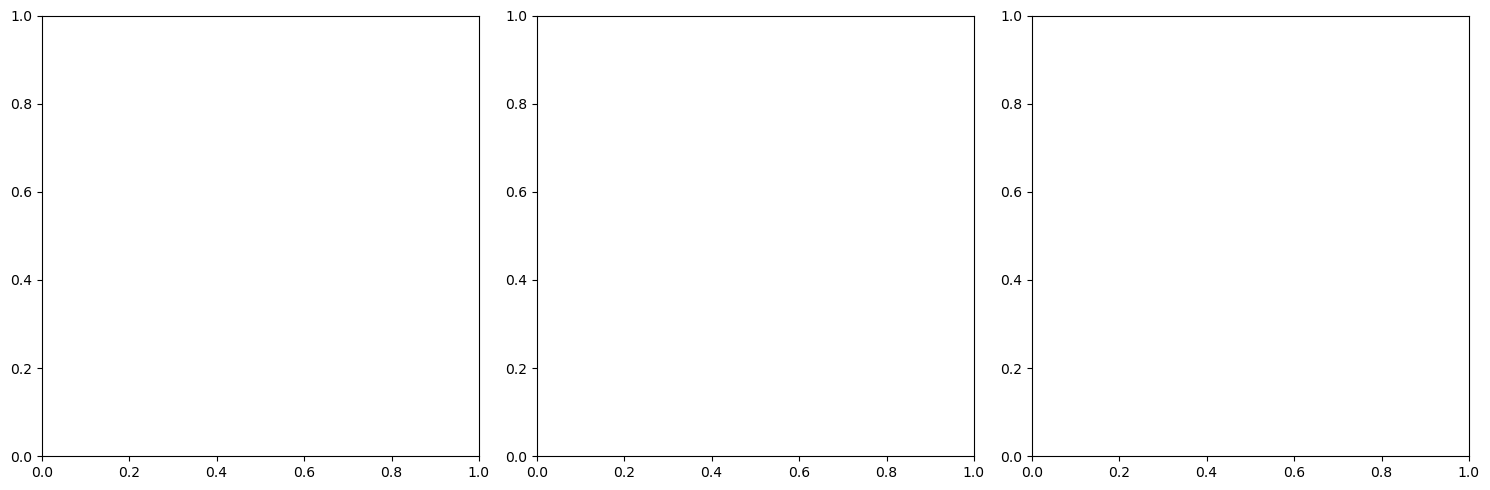

In [34]:
# Función segura para graficar con manejo de errores
def grafico_seguro(x, y, xlabel, ylabel, title):
    """Función segura para crear gráficos de dispersión"""
    # Filtrar datos válidos
    valid_data = pd.DataFrame({'x': x, 'y': y}).dropna()
    
    if len(valid_data) < 2:
        print(f"Advertencia: No hay suficientes datos para {title}")
        return
    
    plt.scatter(valid_data['x'], valid_data['y'], alpha=0.6, s=50)
    
    # Calcular y dibujar línea de tendencia solo si hay suficientes datos
    if len(valid_data) >= 2:
        try:
            z = np.polyfit(valid_data['x'], valid_data['y'], 1)
            p = np.poly1d(z)
            x_range = np.linspace(valid_data['x'].min(), valid_data['x'].max(), 100)
            plt.plot(x_range, p(x_range), "r--", linewidth=2)
        except:
            print(f"Error al calcular línea de tendencia para {title}")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, alpha=0.3)

# Usar la función segura
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
grafico_seguro(datos_correlacion['Latitud_num'], datos_correlacion['duración'],
              'Latitud', 'Duración (días)', f'Duración vs Latitud (r = {correlacion_latitud:.3f})')

plt.subplot(1, 3, 2)
grafico_seguro(datos_correlacion['Altura'], datos_correlacion['duración'],
              'Altura (m)', 'Duración (días)', f'Duración vs Altura (r = {correlacion_altura:.3f})')

plt.subplot(1, 3, 3)
grafico_seguro(datos_correlacion['Longitud_num'], datos_correlacion['duración'],
              'Longitud', 'Duración (días)', f'Duración vs Longitud (r = {correlacion_longitud:.3f})')

plt.tight_layout()
plt.show()

**Conclusiones**

El análisis de olas de calor para el año 2012 muestra que 29 estaciones meteorológicas registraron al menos un evento, con un total de 46 olas de calor detectadas. La duración máxima de un evento fue de 5 días en Santo Domingo, mientras que la duración promedio en todo el país fue de aproximadamente 3 días, lo que refleja que, si bien se produjeron olas de calor en gran parte del territorio, estas fueron en general cortas.

Los eventos más severos se concentraron en el centro-sur del país (ejemplo: Chillán, Los Ángeles, Valdivia y Temuco), lo que coincide con la influencia de sistemas de alta presión que favorecen la acumulación de calor en esa zona. En contraste, en el norte grande y en la zona austral los eventos fueron menos frecuentes y de menor duración.

En la estación Maquehue (Temuco Ad.), el análisis detallado permitió identificar de manera precisa los días afectados, evidenciando la utilidad de la matriz día × mes como herramienta visual para estudiar la ocurrencia temporal de olas de calor.

Respecto a la posible relación entre las olas de calor y la ubicación geográfica (latitud, longitud, altura), los resultados mostraron que no se encontró una correlación significativa. Esto se debe principalmente a la falta de datos completos y a la complejidad de los factores que determinan la ocurrencia de estos eventos, donde influyen no solo la geografía, sino también las condiciones sinópticas y locales de cada estación.

En síntesis, el estudio evidencia que en 2012 las olas de calor en Chile fueron relativamente poco frecuentes, de corta duración y con una distribución heterogénea a lo largo del territorio, destacando que no se pudo establecer una relación estadísticamente robusta entre su ocurrencia y las variables geográficas disponibles.

## Tendencia anual (15 pts)

Para cada estación, estime la **pendiente** (°C/día) de `TMaxima` usando `numpy.polyfit` con `x = día del año` y `y = TMaxima`.

- Reporte la pendiente y ordene las 10 estaciones con pendiente más alta (calentamiento) y más baja (enfriamiento).


In [35]:
# Crear columna de día del año (día juliano)
df['dia_del_año'] = df.groupby('Año').cumcount() + 1

# Función para calcular la pendiente de tendencia
def calcular_tendencia(grupo):
    """Calcula la pendiente de tendencia de TMaxima para una estación"""
    if len(grupo) < 2:  # Necesitamos al menos 2 puntos
        return np.nan
    
    try:
        # Calcular pendiente usando polyfit
        x = grupo['dia_del_año'].values
        y = grupo['TMaxima'].values
        
        # Filtrar valores NaN
        mask = ~np.isnan(x) & ~np.isnan(y)
        x_clean = x[mask]
        y_clean = y[mask]
        
        if len(x_clean) < 2:
            return np.nan
            
        # Calcular pendiente (°C por día)
        pendiente = np.polyfit(x_clean, y_clean, 1)[0]
        return pendiente
        
    except:
        return np.nan

# Calcular pendiente de tendencia para cada estación
tendencias_estaciones = df.groupby(['IdEstacion', 'Nombre Estacion']).apply(
    lambda x: calcular_tendencia(x)
).reset_index(name='pendiente_tendencia')

# Convertir pendiente a °C por año (multiplicar por 365 días)
tendencias_estaciones['pendiente_anual'] = tendencias_estaciones['pendiente_tendencia'] * 365

# Mostrar resultados
print("Tendencias de temperatura por estación:")
print(tendencias_estaciones.sort_values('pendiente_tendencia', ascending=False).head(10))

Tendencias de temperatura por estación:
    IdEstacion                           Nombre Estacion  pendiente_tendencia  \
23      450001                          Puerto Aysen Ad.             0.050771   
2       220002                        El Loa, Calama Ad.             0.001825   
31      550001  Guardia Marina Zanartu, Pto Williams Ad.             0.001511   
26      460001                           Chile Chico Ad.            -0.003816   
29      520006           Carlos Ibanez, Punta Arenas Ap.            -0.006685   
28      510005     Teniente Gallardo, Puerto Natales Ad.            -0.008243   
11      330030                        Santo Domingo, Ad.            -0.009218   
27      470001                         Lord Cochrane Ad.            -0.009835   
32      950001  C.M.A. Eduardo Frei Montalva, Antartica             -0.010755   
6       290004                 La Florida, La Serena Ad.            -0.011278   

    pendiente_anual  
23        18.531440  
2          0.666239  
31

C:\Users\adanm\AppData\Local\Temp\ipykernel_17196\4213912692.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tendencias_estaciones = df.groupby(['IdEstacion', 'Nombre Estacion']).apply(


In [36]:
# Ordenar por pendiente descendente (mayor calentamiento)
top_calentamiento = tendencias_estaciones.nlargest(10, 'pendiente_tendencia')[['IdEstacion', 'Nombre Estacion', 'pendiente_tendencia', 'pendiente_anual']]

print("TOP 10 ESTACIONES CON MAYOR CALENTAMIENTO")
print("=" * 60)
print(f"{'ID':<10} {'Estación':<30} {'Pendiente (°C/día)':<18} {'Pendiente (°C/año)':<18}")
print("-" * 60)

for i, row in top_calentamiento.iterrows():
    print(f"{row['IdEstacion']:<10} {row['Nombre Estacion'][:28]:<30} {row['pendiente_tendencia']:>12.6f} {row['pendiente_anual']:>16.4f}")

print("\n" + "=" * 60)

TOP 10 ESTACIONES CON MAYOR CALENTAMIENTO
ID         Estación                       Pendiente (°C/día) Pendiente (°C/año)
------------------------------------------------------------
450001     Puerto Aysen Ad.                   0.050771          18.5314
220002     El Loa, Calama Ad.                 0.001825           0.6662
550001     Guardia Marina Zanartu, Pto        0.001511           0.5515
460001     Chile Chico Ad.                   -0.003816          -1.3930
520006     Carlos Ibanez, Punta Arenas       -0.006685          -2.4401
510005     Teniente Gallardo, Puerto Na      -0.008243          -3.0088
330030     Santo Domingo, Ad.                -0.009218          -3.3645
470001     Lord Cochrane Ad.                 -0.009835          -3.5897
950001     C.M.A. Eduardo Frei Montalva      -0.010755          -3.9257
290004     La Florida, La Serena Ad.         -0.011278          -4.1166



In [37]:
# Ordenar por pendiente ascendente (mayor enfriamiento)
top_enfriamiento = tendencias_estaciones.nsmallest(10, 'pendiente_tendencia')[['IdEstacion', 'Nombre Estacion', 'pendiente_tendencia', 'pendiente_anual']]

print("TOP 10 ESTACIONES CON MAYOR ENFRIAMIENTO")
print("=" * 60)
print(f"{'ID':<10} {'Estación':<30} {'Pendiente (°C/día)':<18} {'Pendiente (°C/año)':<18}")
print("-" * 60)

for i, row in top_enfriamiento.iterrows():
    print(f"{row['IdEstacion']:<10} {row['Nombre Estacion'][:28]:<30} {row['pendiente_tendencia']:>12.6f} {row['pendiente_anual']:>16.4f}")

print("\n" + "=" * 60)

TOP 10 ESTACIONES CON MAYOR ENFRIAMIENTO
ID         Estación                       Pendiente (°C/día) Pendiente (°C/año)
------------------------------------------------------------
340031     General Freire, Curico Ad.        -0.020278          -7.4013
360011     Bernardo O"higgins, Chillan       -0.019654          -7.1739
370033     Maria Dolores, Los Angeles A      -0.019430          -7.0921
430002     Futaleufu Ad.                     -0.018273          -6.6697
200006     Diego Aracena Iquique Ap.         -0.018210          -6.6467
330031     Juan Fernandez, Estacion Met      -0.017893          -6.5310
380013     Maquehue, Temuco Ad.              -0.017387          -6.3461
330021     Pudahuel Santiago                 -0.017339          -6.3286
330019     Eulogio Sanchez, Tobalaba Ad      -0.016682          -6.0889
180005     Chacalluta, Arica Ap.             -0.016430          -5.9970



In [38]:
# Estadísticas descriptivas
print("ESTADÍSTICAS DE LAS TENDENCIAS")
print("=" * 40)
print(f"Número total de estaciones analizadas: {len(tendencias_estaciones)}")
print(f"Estaciones con tendencia positiva (calentamiento): {len(tendencias_estaciones[tendencias_estaciones['pendiente_tendencia'] > 0])}")
print(f"Estaciones con tendencia negativa (enfriamiento): {len(tendencias_estaciones[tendencias_estaciones['pendiente_tendencia'] < 0])}")
print(f"Pendiente promedio: {tendencias_estaciones['pendiente_tendencia'].mean():.6f} °C/día")
print(f"Pendiente anual promedio: {tendencias_estaciones['pendiente_anual'].mean():.4f} °C/año")
print(f"Pendiente máxima: {tendencias_estaciones['pendiente_tendencia'].max():.6f} °C/día")
print(f"Pendiente mínima: {tendencias_estaciones['pendiente_tendencia'].min():.6f} °C/día")

ESTADÍSTICAS DE LAS TENDENCIAS
Número total de estaciones analizadas: 33
Estaciones con tendencia positiva (calentamiento): 3
Estaciones con tendencia negativa (enfriamiento): 30
Pendiente promedio: -0.010920 °C/día
Pendiente anual promedio: -3.9859 °C/año
Pendiente máxima: 0.050771 °C/día
Pendiente mínima: -0.020278 °C/día


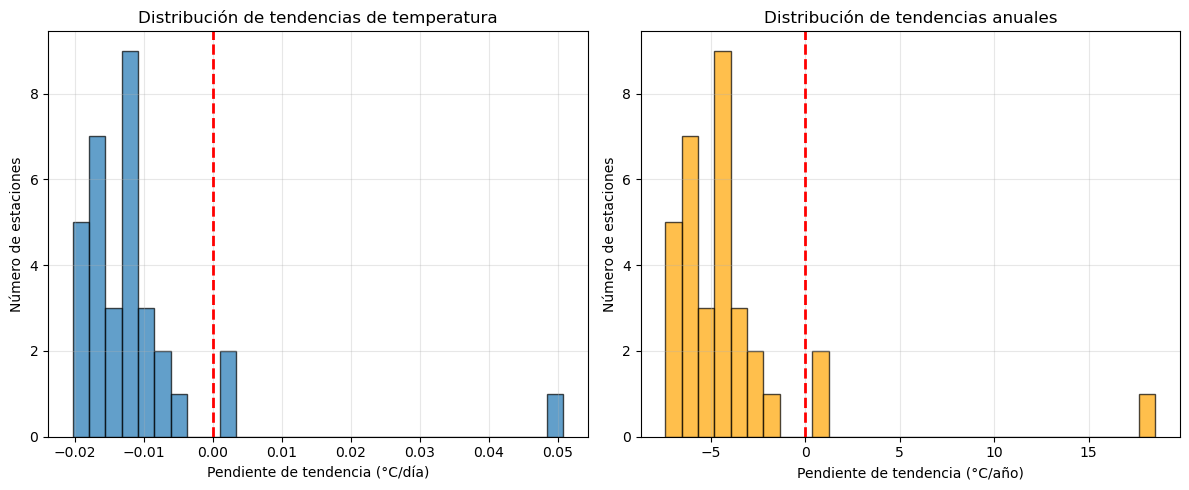

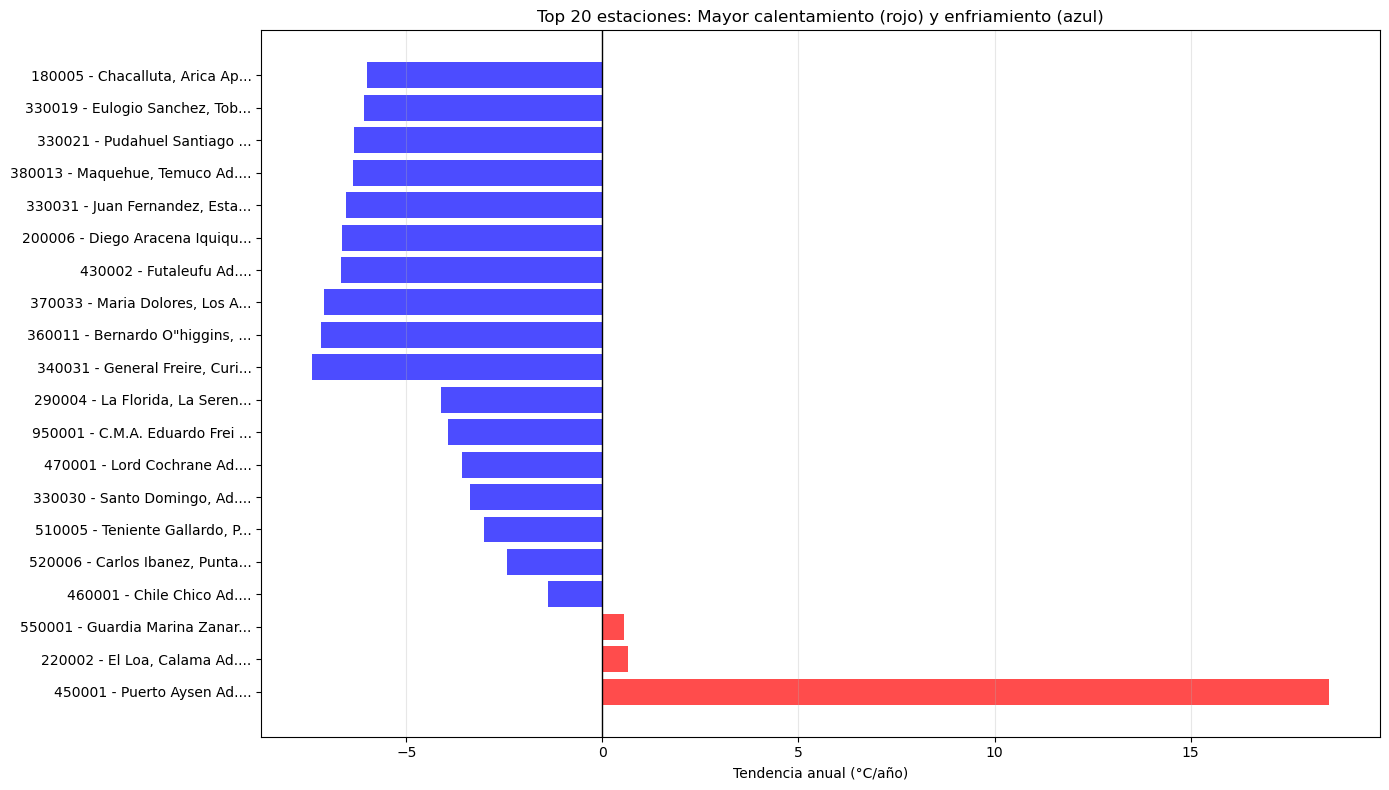

In [39]:
import matplotlib.pyplot as plt

# Histograma de las pendientes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(tendencias_estaciones['pendiente_tendencia'].dropna(), bins=30, alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Pendiente de tendencia (°C/día)')
plt.ylabel('Número de estaciones')
plt.title('Distribución de tendencias de temperatura')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(tendencias_estaciones['pendiente_anual'].dropna(), bins=30, alpha=0.7, edgecolor='black', color='orange')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Pendiente de tendencia (°C/año)')
plt.ylabel('Número de estaciones')
plt.title('Distribución de tendencias anuales')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico de las 20 estaciones con mayores tendencias (10 calentamiento + 10 enfriamiento)
plt.figure(figsize=(14, 8))

# Combinar top calentamiento y enfriamiento
top_20 = pd.concat([top_calentamiento.head(10), top_enfriamiento.head(10)])
colors = ['red' if x > 0 else 'blue' for x in top_20['pendiente_anual']]

plt.barh(range(len(top_20)), top_20['pendiente_anual'], color=colors, alpha=0.7)
plt.yticks(range(len(top_20)), [f"{row['IdEstacion']} - {row['Nombre Estacion'][:20]}..." for _, row in top_20.iterrows()])
plt.xlabel('Tendencia anual (°C/año)')
plt.title('Top 20 estaciones: Mayor calentamiento (rojo) y enfriamiento (azul)')
plt.axvline(0, color='black', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

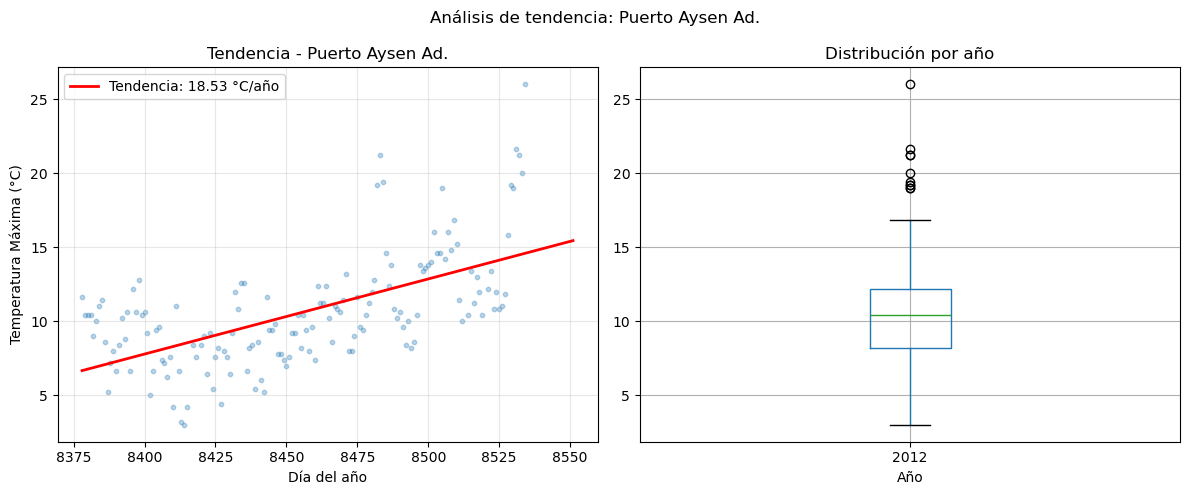

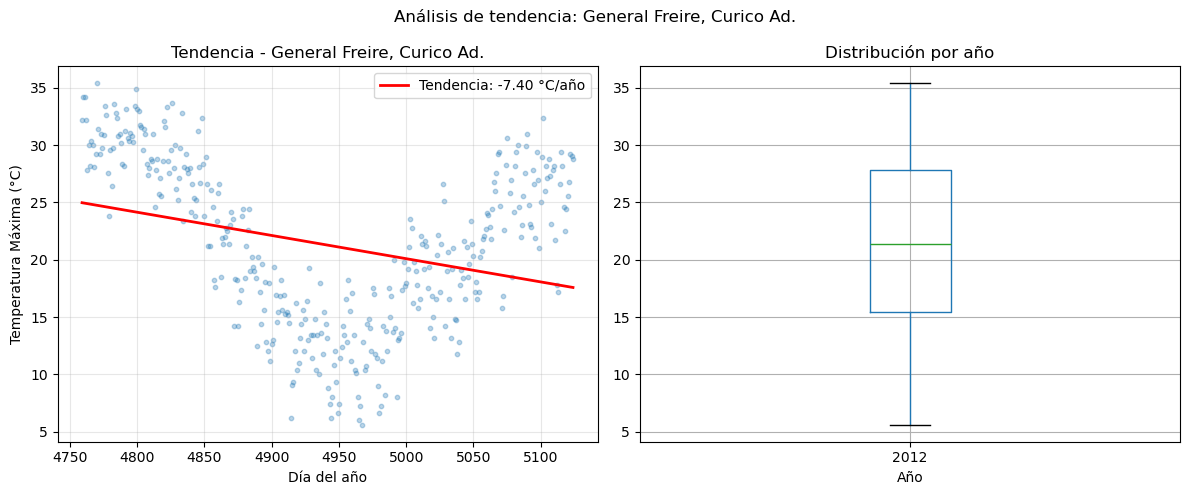

In [40]:
# Función para graficar tendencia de una estación específica
def graficar_tendencia_estacion(id_estacion, nombre_estacion):
    """Grafica la tendencia de temperatura para una estación específica"""
    estacion_data = df[df['IdEstacion'] == id_estacion].copy()
    
    if len(estacion_data) < 2:
        print(f"No hay suficientes datos para la estación {nombre_estacion}")
        return
    
    plt.figure(figsize=(12, 5))
    
    # Gráfico de dispersión
    plt.subplot(1, 2, 1)
    plt.scatter(estacion_data['dia_del_año'], estacion_data['TMaxima'], alpha=0.3, s=10)
    
    # Línea de tendencia
    x = estacion_data['dia_del_año'].values
    y = estacion_data['TMaxima'].values
    mask = ~np.isnan(x) & ~np.isnan(y)
    
    if sum(mask) >= 2:
        z = np.polyfit(x[mask], y[mask], 1)
        p = np.poly1d(z)
        x_range = np.linspace(x.min(), x.max(), 100)
        plt.plot(x_range, p(x_range), 'r-', linewidth=2, 
                label=f'Tendencia: {z[0]*365:.2f} °C/año')
        plt.legend()
    
    plt.xlabel('Día del año')
    plt.ylabel('Temperatura Máxima (°C)')
    plt.title(f'Tendencia - {nombre_estacion}')
    plt.grid(True, alpha=0.3)
    
    # Boxplot por año para ver variación interanual
    plt.subplot(1, 2, 2)
    estacion_data.boxplot(column='TMaxima', by='Año', ax=plt.gca())
    plt.title('Distribución por año')
    plt.suptitle(f'Análisis de tendencia: {nombre_estacion}')
    plt.tight_layout()
    plt.show()

# Ejemplo: Graficar tendencia para las estaciones con mayor calentamiento y enfriamiento
if len(top_calentamiento) > 0:
    primera_calentamiento = top_calentamiento.iloc[0]
    graficar_tendencia_estacion(primera_calentamiento['IdEstacion'], primera_calentamiento['Nombre Estacion'])

if len(top_enfriamiento) > 0:
    primera_enfriamiento = top_enfriamiento.iloc[0]
    graficar_tendencia_estacion(primera_enfriamiento['IdEstacion'], primera_enfriamiento['Nombre Estacion'])

## Visualizaciones (15 pts)

1. Para una estación `Chacalluta, Arica Ap`, grafique series de `TMinima` y `TMaxima` a lo largo del año.  
2. : Resumir TMaxima por mes con dispersión.
- Pasos:
    - Agrupa por mes y calcula mean y std de TMaxima.
    - Grafica barras de medias con barras de error (±SD).
3. Resaltar días extremadamente cálidos.
- Pasos:
    - Calcula umbral Percentil 99 de TMaxima para cada estación.
    - Grafica serie de TMaxima y marca con puntos los ≥ P99; agrega línea horizontal en P99.
4. En otra figura, cree un **boxplot** del `Rango` por mes para cada estación de medición.


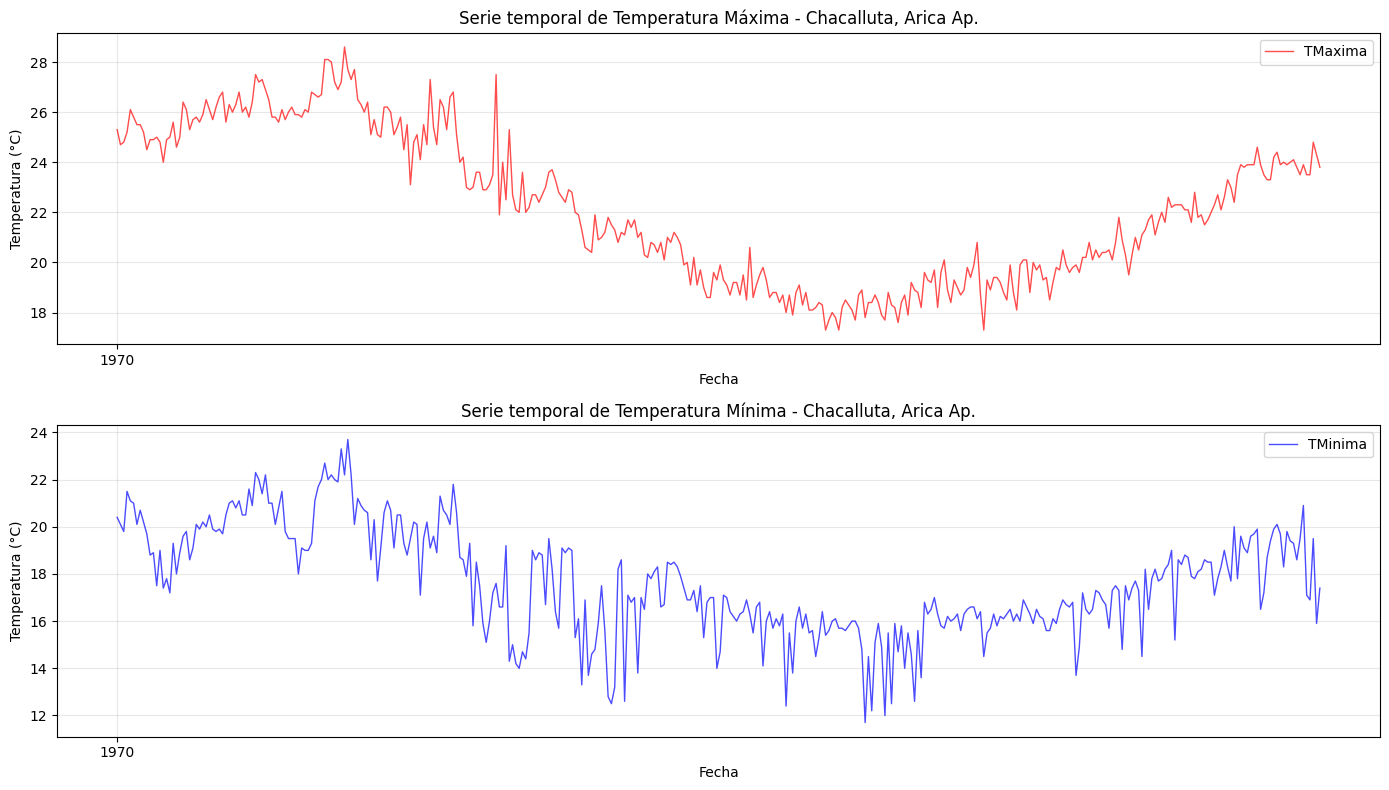

In [23]:
# Filtrar datos para Chacalluta, Arica Ap.
chacalluta_data = df[df['Nombre Estacion'].str.contains('Chacalluta', case=False, na=False)].copy()

# Asegurar que el índice 'Fecha' esté en formato datetime
chacalluta_data.index = pd.to_datetime(chacalluta_data.index)

# Gráfico de series temporales
plt.figure(figsize=(14, 8))

# Serie de TMaxima
plt.subplot(2, 1, 1)
plt.plot(chacalluta_data.index, chacalluta_data['TMaxima'], 
         color='red', alpha=0.7, linewidth=1, label='TMaxima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.title('Serie temporal de Temperatura Máxima - Chacalluta, Arica Ap.')
plt.legend()
plt.grid(True, alpha=0.3)

# Serie de TMinima
plt.subplot(2, 1, 2)
plt.plot(chacalluta_data.index, chacalluta_data['TMinima'], 
         color='blue', alpha=0.7, linewidth=1, label='TMinima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.title('Serie temporal de Temperatura Mínima - Chacalluta, Arica Ap.')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


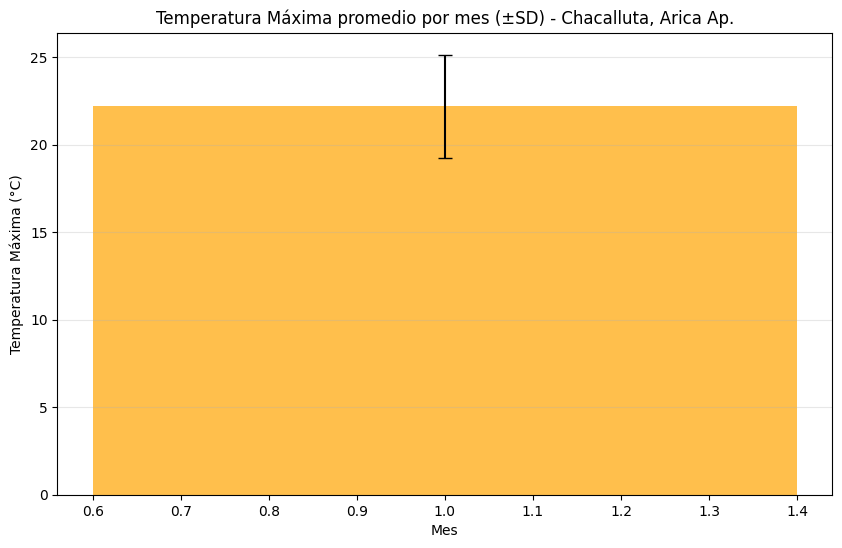

In [24]:
# Agrupar por mes
chacalluta_data['Mes'] = chacalluta_data.index.month
resumen = chacalluta_data.groupby('Mes')['TMaxima'].agg(['mean', 'std'])

# Gráfico de barras con barras de error
plt.figure(figsize=(10,6))
plt.bar(resumen.index, resumen['mean'], yerr=resumen['std'], 
        capsize=5, color='orange', alpha=0.7)
plt.xlabel('Mes')
plt.ylabel('Temperatura Máxima (°C)')
plt.title('Temperatura Máxima promedio por mes (±SD) - Chacalluta, Arica Ap.')
plt.grid(axis='y', alpha=0.3)
plt.show()

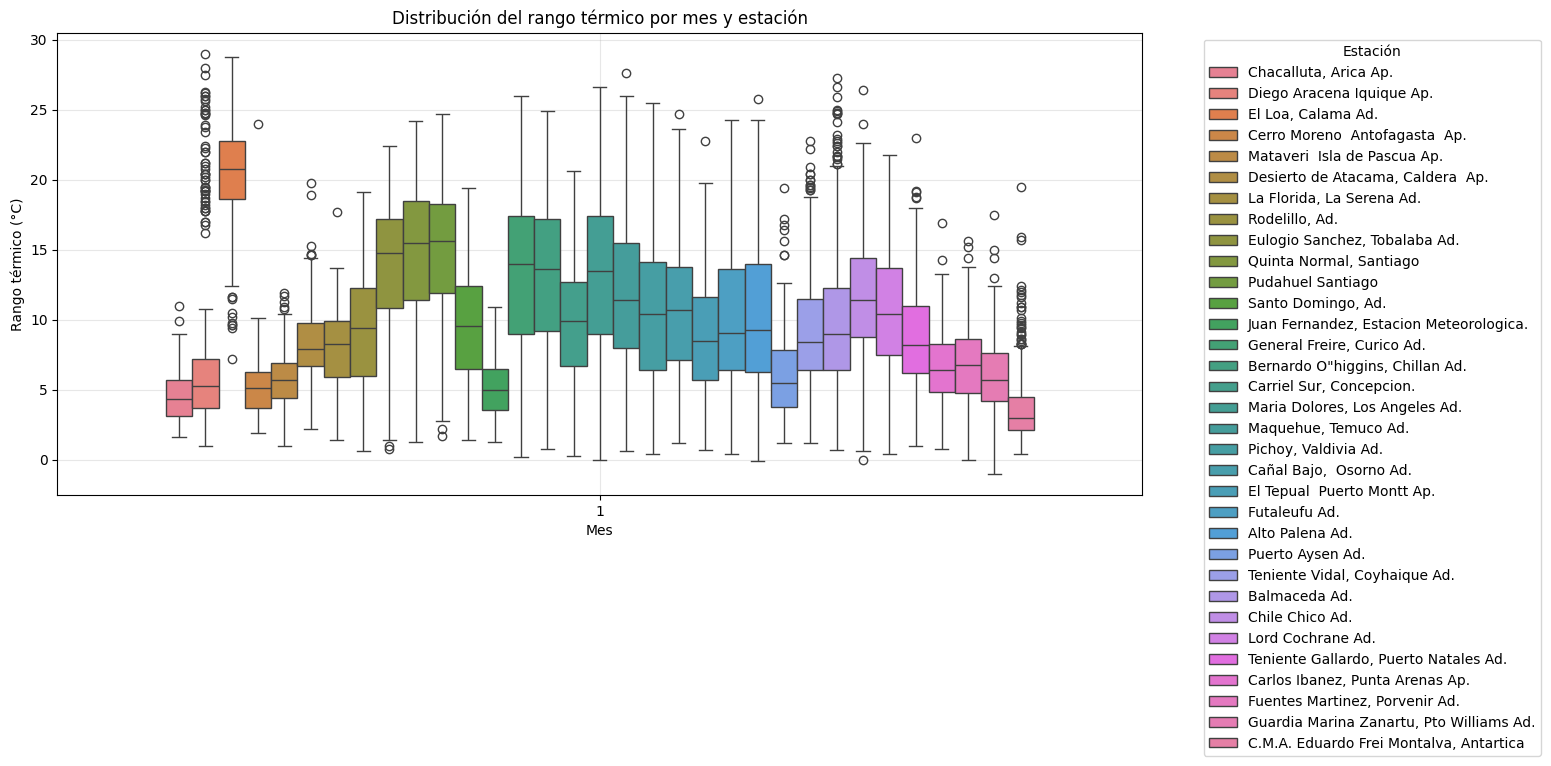

In [30]:
# Crear columna de mes en todo el df
df['Mes'] = pd.to_datetime(df.index).month
# Crear la columna Rango en todo el dataset
df['Rango'] = df['TMaxima'] - df['TMinima']

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Mes', y='Rango', hue='Nombre Estacion')
plt.xlabel('Mes')
plt.ylabel('Rango térmico (°C)')
plt.title('Distribución del rango térmico por mes y estación')
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()
